# Experiment 4

This experiment investigates the convergence rates when $p = O(n^{3/4})$, using saturated features.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [12]:
ps = np.arange(4,41)
p_true = max(ps)
ns = np.floor(1.1*ps**(4/3))
n_true = 50000
n_experiments = 150
λ = 3
δ = 0.2

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [13]:
np.array([ps,ns]).T

array([[   4.,    6.],
       [   5.,    9.],
       [   6.,   11.],
       [   7.,   14.],
       [   8.,   17.],
       [   9.,   20.],
       [  10.,   23.],
       [  11.,   26.],
       [  12.,   30.],
       [  13.,   33.],
       [  14.,   37.],
       [  15.,   40.],
       [  16.,   44.],
       [  17.,   48.],
       [  18.,   51.],
       [  19.,   55.],
       [  20.,   59.],
       [  21.,   63.],
       [  22.,   67.],
       [  23.,   71.],
       [  24.,   76.],
       [  25.,   80.],
       [  26.,   84.],
       [  27.,   89.],
       [  28.,   93.],
       [  29.,   98.],
       [  30.,  102.],
       [  31.,  107.],
       [  32.,  111.],
       [  33.,  116.],
       [  34.,  121.],
       [  35.,  125.],
       [  36.,  130.],
       [  37.,  135.],
       [  38.,  140.],
       [  39.,  145.],
       [  40.,  150.]])

In [14]:
# True market
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized market
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [15]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [16]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [17]:
# Results placeholder
qs = np.zeros(shape=(len(ns),p_true+1,n_experiments))
CEs_ins = np.empty(shape=(len(ns),n_experiments))
CEs_oos = np.empty(shape=(len(ns),n_experiments))

In [18]:
# About 8minutes running time.
for i,(n,p) in enumerate(zip(ns,ps)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf,problem_t=pr.SaturatedFeaturesMaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs[i,:p+1,:] = prs.qs.T
    CEs_ins[i,:] = prs.CEs_ins
    CEs_oos[i,:] = prs.CEs_oos

Sampling 150 problems of size 150 × 41
Sampling 150 problems of size 145 × 40
Sampling 150 problems of size 140 × 39
Sampling 150 problems of size 135 × 38
Sampling 150 problems of size 130 × 37
Sampling 150 problems of size 125 × 36
Sampling 150 problems of size 121 × 35
Sampling 150 problems of size 116 × 34
Sampling 150 problems of size 111 × 33
Sampling 150 problems of size 107 × 32
Sampling 150 problems of size 102 × 31
Sampling 150 problems of size 98 × 30
Sampling 150 problems of size 93 × 29
Sampling 150 problems of size 89 × 28
Sampling 150 problems of size 84 × 27
Sampling 150 problems of size 80 × 26
Sampling 150 problems of size 76 × 25
Sampling 150 problems of size 71 × 24
Sampling 150 problems of size 67 × 23
Sampling 150 problems of size 63 × 22
Sampling 150 problems of size 59 × 21
Sampling 150 problems of size 55 × 20
Sampling 150 problems of size 51 × 19
Sampling 150 problems of size 48 × 18
Sampling 150 problems of size 44 × 17
Sampling 150 problems of size 40 × 16
S

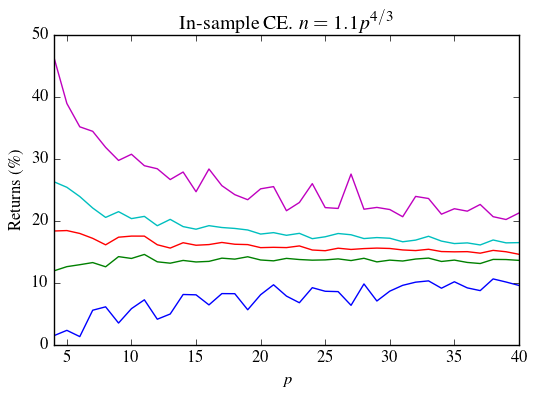

In [20]:
plt.plot(*five_stats(CEs_ins,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)')
plt.axis(xmin=4)
plt.title('In-sample CE. $n = 1.1p^{4/3}$');

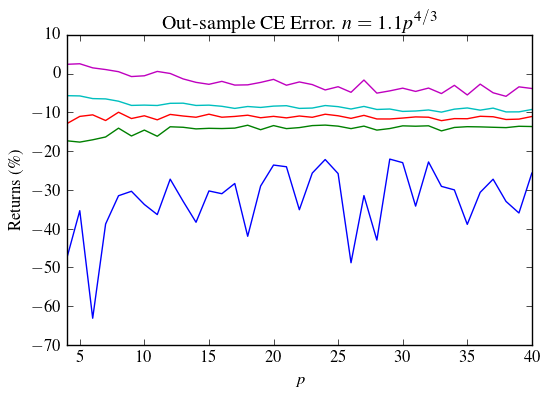

In [24]:
plt.plot(*five_stats(CEs_oos-CEs_ins,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)')
plt.axis(xmin=4)
plt.title('Out-sample CE Error. $n = 1.1p^{4/3}$');

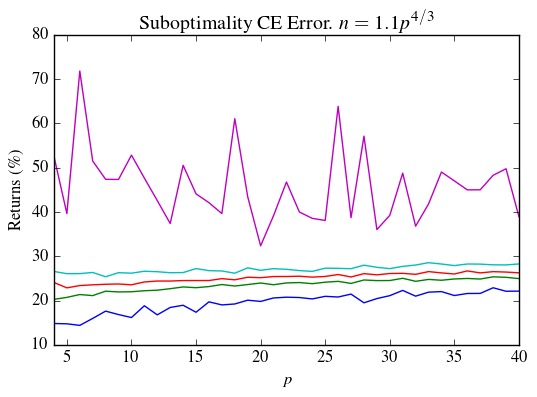

In [27]:
plt.plot(*five_stats(CE_star_q_star - CEs_oos,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)');
plt.axis(xmin=4)
plt.title('Suboptimality CE Error. $n = 1.1p^{4/3}$');